# Segmentación de Imágenes RGB con K-medias

En este notebook se implementa un algoritmo de segmentación de imágenes RGB utilizando el algoritmo de **K-medias**.  
Se le permite al usuario elegir el parámetro **k** (número de segmentos, con k ≥ 2).  

Para cada ejemplo se muestran:
- **a)** La imagen original.
- **b)** El mapa de segmentos (o clases) obtenido mediante K-medias.
- **c)** La imagen cuantizada, donde cada píxel es reemplazado por el promedio de color de su segmento.

Se evaluarán 4 ejemplos:
- **2 buenos:** Imágenes con regiones bien definidas (por ejemplo, *coffee* y *astronaut* de *skimage*).
- **2 malos:** Imágenes en las que el algoritmo muestra limitaciones (por ejemplo, un degradado suave y una imagen de ruido aleatorio).


In [10]:
import numpy as np 
import matplotlib.pyplot as plt
from skimage import data
from sklearn.cluster import KMeans

In [22]:
import numpy as np
def segment_image_kmeans(img,k):
     """
    Segmenta una imagen RGB utilizando K-means.
    
    Parámetros:
        img: Imagen RGB (numpy array, uint8).
        k: Número de clusters/segmentos (k >= 2).
        
    Retorna:
        seg_map: Mapa de segmentos (imagen de etiquetas con forma [alto, ancho]).
        quantized_img: Imagen cuantizada, donde cada píxel toma el color promedio de su segmento.
    """
    # Convertir la imagen a un arreglo 2D: (número de píxeles, 3)
     pixels = img.reshape(-1, 3)
     pixels = np.float32(pixels)
     
     #Aplicar K-means
     kmeans = KMeans(n_clusters=k, random_state=42)
     labels = kmeans.fit_predict(pixels)

    # Crear el mapa de segmentos (reshape a la forma original)
     seg_map = labels.reshape(img.shape[0], img.shape[1])

        # Crear la imagen cuantizada usando los centros de los clusters
     quant_pixels = np.zeros_like(pixels)

     for i in range(k):
        quant_pixels[labels == i] = kmeans.cluster_centers_[i]
        quant_image = quant_pixels.reshape(img.shape)
        quant_image= np.clip(quant_image, 0, 255).astype(np.uint8)

        return seg_map, quant_image

In [24]:
#Solicitar al usuario el valor de k, asegurandonos que sea mayor igual a 2
while True:
    try:
        k = int(input("Ingrese el valor de k (k >= 2): "))
        if k < 2:
            print("El valor de k debe ser mayor o igual a 2. Vuelva a intentarlo.")
        else:
            break
    except ValueError:
        print("Por favor, ingrese un número entero válido.") 

In [13]:

# Ejemplo bueno 1: Imagen 'coffee' de skimage (regiones bien definidas)
img1 = data.coffee()

# Ejemplo bueno 2: Imagen 'astronaut' de skimage (diferentes regiones y colores)
img2 = data.astronaut()

In [14]:
img1

array([[[ 21,  13,   8],
        [ 21,  13,   9],
        [ 20,  11,   8],
        ...,
        [228, 182, 138],
        [231, 185, 142],
        [228, 184, 140]],

       [[ 21,  13,   7],
        [ 21,  13,   9],
        [ 20,  14,   7],
        ...,
        [228, 182, 136],
        [231, 185, 139],
        [229, 183, 137]],

       [[ 21,  14,   7],
        [ 23,  13,  10],
        [ 20,  14,   9],
        ...,
        [228, 182, 136],
        [228, 184, 137],
        [229, 185, 138]],

       ...,

       [[189, 124,  77],
        [214, 155, 109],
        [197, 141, 100],
        ...,
        [165,  86,  37],
        [161,  82,  41],
        [143,  67,  29]],

       [[207, 148, 102],
        [201, 142,  99],
        [196, 140,  97],
        ...,
        [154,  74,  37],
        [147,  66,  33],
        [145,  65,  31]],

       [[197, 141, 100],
        [195, 137,  99],
        [193, 138,  98],
        ...,
        [158,  73,  38],
        [144,  64,  30],
        [143,  60,  29]]

In [15]:
img2


array([[[154, 147, 151],
        [109, 103, 124],
        [ 63,  58, 102],
        ...,
        [127, 120, 115],
        [120, 117, 106],
        [125, 119, 110]],

       [[177, 171, 171],
        [144, 141, 143],
        [113, 114, 124],
        ...,
        [127, 118, 112],
        [124, 115, 108],
        [121, 116, 105]],

       [[201, 194, 193],
        [182, 178, 175],
        [168, 165, 164],
        ...,
        [128, 120, 117],
        [126, 116, 112],
        [124, 114, 109]],

       ...,

       [[186, 170, 176],
        [186, 170, 177],
        [183, 168, 170],
        ...,
        [  0,   0,   0],
        [  0,   0,   1],
        [  0,   0,   0]],

       [[183, 169, 170],
        [182, 167, 171],
        [185, 164, 176],
        ...,
        [  0,   0,   1],
        [  1,   1,   1],
        [  0,   0,   0]],

       [[184, 167, 172],
        [183, 165, 169],
        [180, 162, 171],
        ...,
        [  0,   0,   0],
        [  1,   1,   1],
        [  0,   0,   0]]

In [16]:
# Ejemplo malo 1: Imagen con degradado suave
gradiente = np.linspace(0, 255, 256, dtype=np.uint8)
gradiente_rgb = np.dstack([gradiente] * 3)  # Crea una fila con degradado en R, G y B
img3 = np.tile(gradiente_rgb, (256, 1, 1))    # Repetir la fila para formar una imagen 256x256

# Ejemplo malo 2: Imagen con ruido aleatorio
np.random.seed(42)
img4 = np.random.randint(0, 256, (256, 256, 3), dtype=np.uint8)

# Lista de ejemplos (tupla: (título, imagen))
ejemplos = [
    ("Coffee (Bueno)", img1),
    ("Astronaut (Bueno)", img2),
    ("Gradiente Suave (Malo)", img3),
    ("Ruido Aleatorio (Malo)", img4)
]

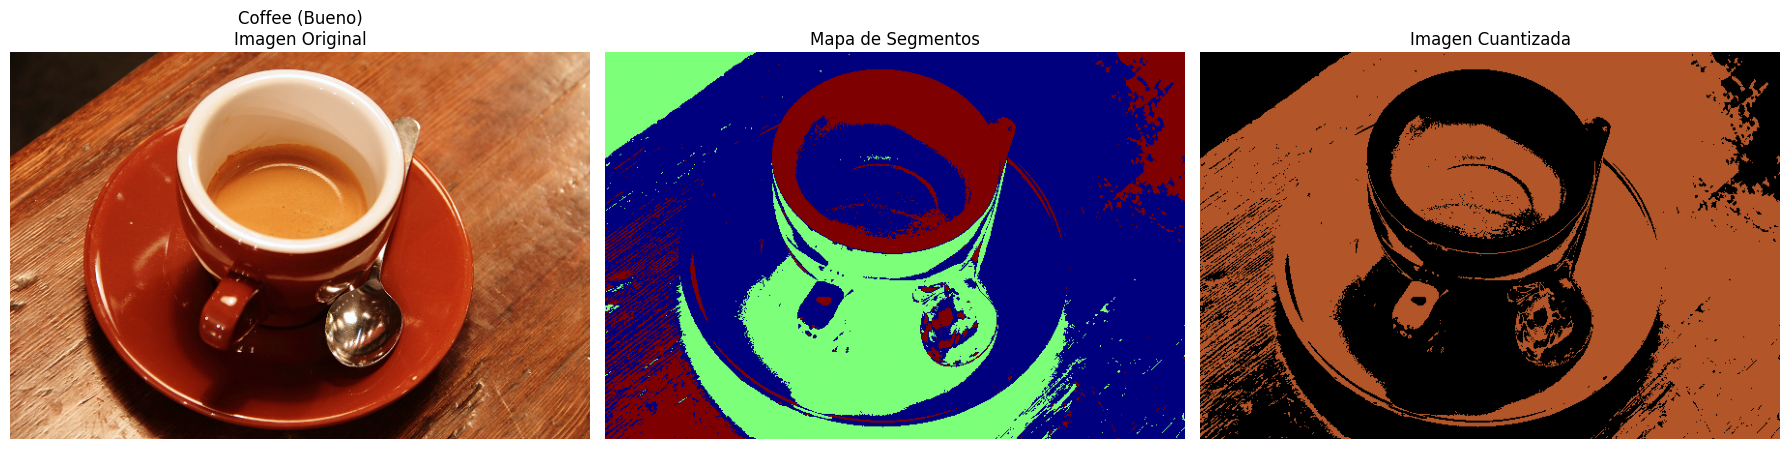

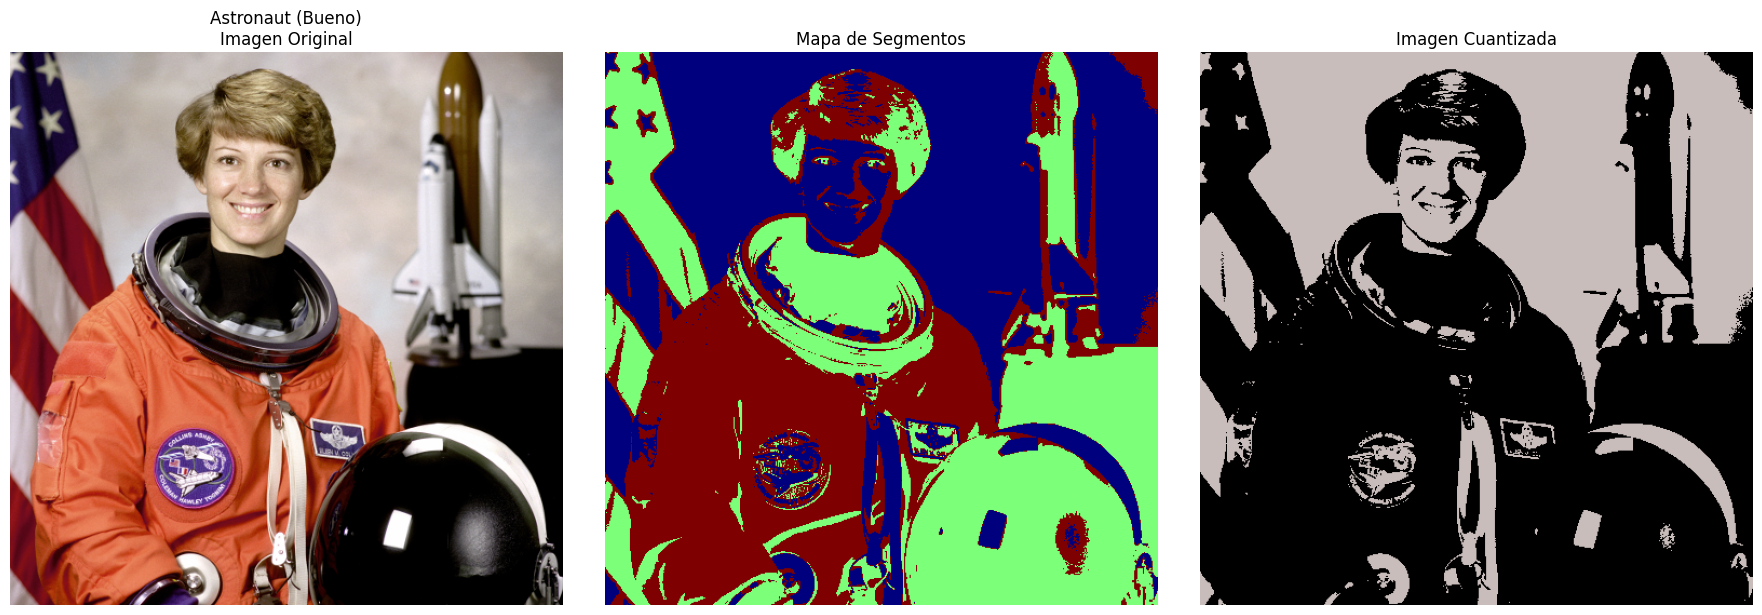

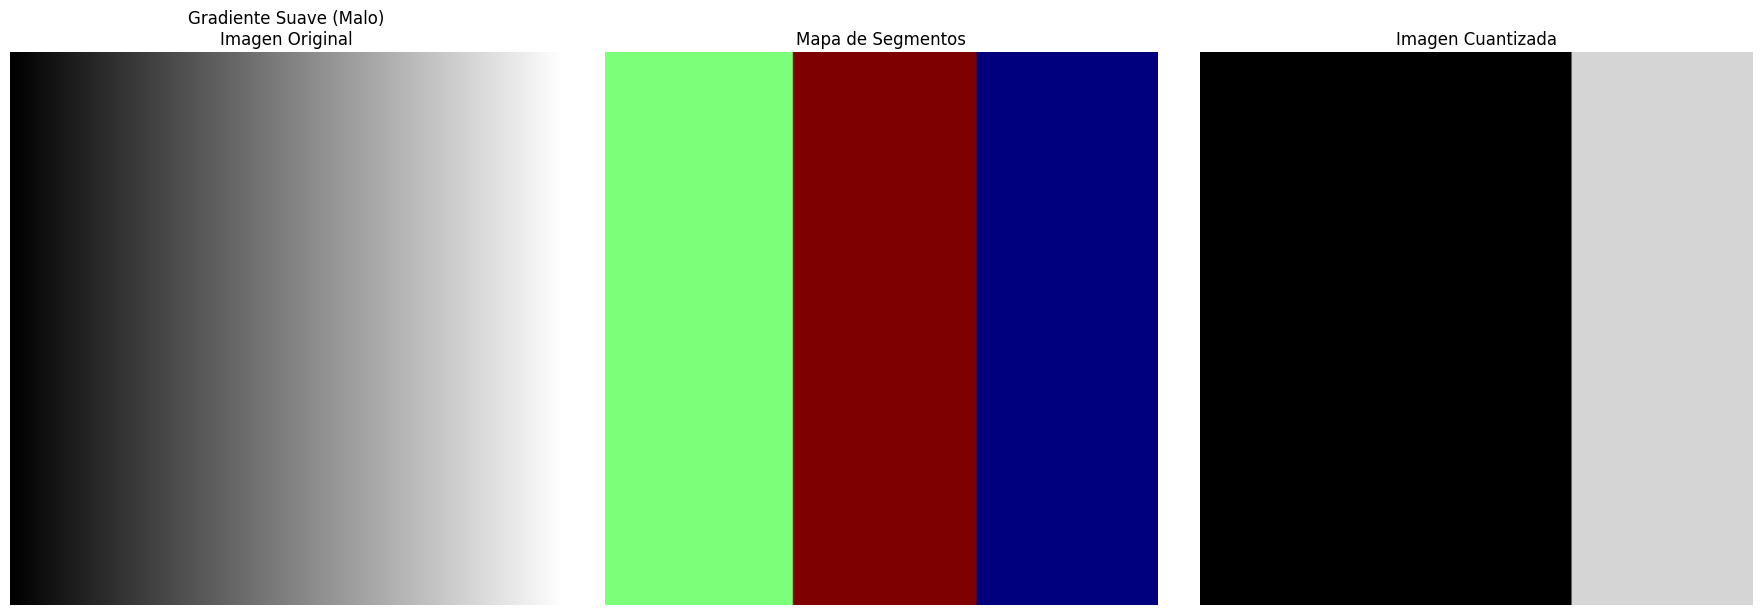

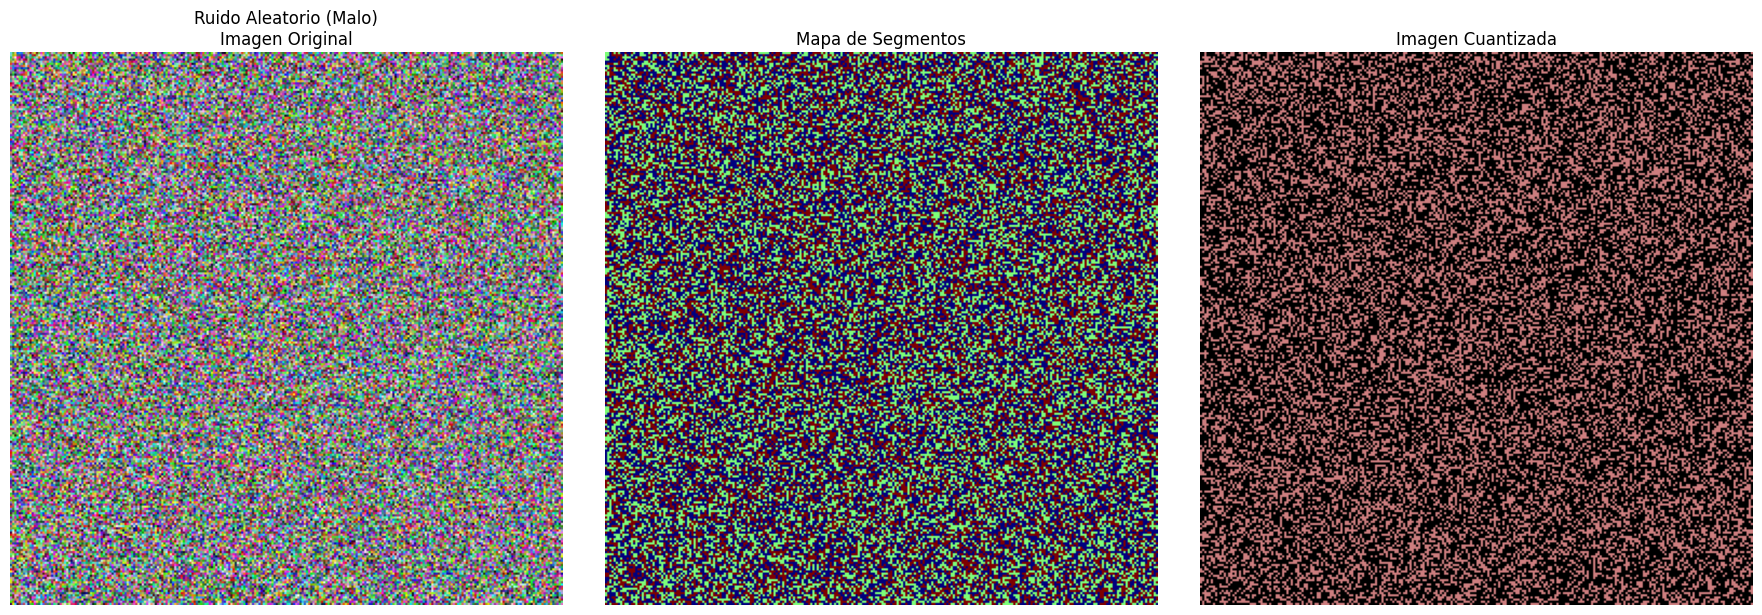

In [25]:
# Para cada ejemplo, se realiza la segmentación y se muestran:
# a) La imagen original.
# b) El mapa de segmentos (con un colormap para distinguir las etiquetas).
# c) La imagen cuantizada.

for titulo, imagen in ejemplos:
    seg_map, quantized_img = segment_image_kmeans(imagen, k)
    
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))
    
    # a) Imagen original
    axs[0].imshow(imagen)
    axs[0].set_title(f"{titulo}\nImagen Original")
    axs[0].axis('off')
    
    # b) Mapa de segmentos (con colormap 'jet' para distinguir las clases)
    axs[1].imshow(seg_map, cmap='jet')
    axs[1].set_title("Mapa de Segmentos")
    axs[1].axis('off')
    
    # c) Imagen cuantizada (cada píxel toma el color promedio de su segmento)
    axs[2].imshow(quantized_img)
    axs[2].set_title("Imagen Cuantizada")
    axs[2].axis('off')
    
    plt.tight_layout()
    plt.show()
